$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Stochastic Gradient Descent for Simple Models

Daniel Kielman
dwkielman@gmail.com

## Overview

In this assignment, we will be using the derivation of the gradient of the sum of squared errors with respect to the linear model's weight and the stochastic gradient descent formula for updating the model's weights in an effort to minimize the error of the four simple models.

## Linear Model

Using the source [04 Linear Regression Using Stochastic Gradient Descent (SGD)](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/04%20Linear%20Regression%20Using%20Stochastic%20Gradient%20Descent%20(SGD).ipynb), we begin with $g$ being an affine (linear + constant) function of $x$,

$$
    g(\xv;\wv) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = \xv^T \wv
$$

having parameters $\wv = (w_0, w_1, w_2, \ldots, w_D)$, the solution can be derived to:

$$
\begin{align*}
\wv_{\mbox{best}} &= \argmin{\wv} \sum_{n=1}^N (t_n - g(\xv_n , \wv))^2\\
 & = \argmin{\wv} \sum_{n=1}^N (t_n - \xv_n^T \wv)^2
 \end{align*}
$$

This can be done by rewriting the above summation as a matrix expression,
taking its derivative with respect to $\wv$, setting the derivative
equal to zero, and solving for $\wv$.

$$
      \wv = (X^T X)^{-1} X^T T
$$

To avoid dealing with matrix operations on huge
matrices, we can derive a sequential algorithm for finding $\wv$ by
using the fact that a derivative of a sum is the sum of the
derivatives.  We will now express this derivative as a gradient, which is a vector or matrix of derivatives.

$$
\begin{align*}
g(\xv_n, \wv) &= w_0 + w_1 x_{n,1} + w_2 x_{n,2} + \cdots + w_D x_{n,D} = \xv_n^T \wv\\
\end{align*}
$$

Our Error function ($E$) is given a matrix of inputs, sampled one per row ($X$), and a matrix of our desired outputs, sampled one per row ($T$), and a parameter $w$, the Error is the Sum of the Squared Errors still, Target minus Prediction. 

$$
\begin{align*}
E(\Xv, \Tv, \wv) &= \sum_{n=1}^N (t_n - g(\xv_n, \wv)^2\\
\nabla_\wv E(\Xv, \Tv, \wv) &= \nabla_\wv \left ( \sum_{n=1}^N (t_n - g(\xv_n, \wv)^2 \right )\\
&= 
\sum_{n=1}^N \nabla_\wv (t_n - g(\xv_n, \wv))^2\\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) \nabla_\wv (t_n - g(\xv_n, \wv)) \\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) (-1) \nabla_\wv g(\xv_n, \wv) \\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) (-1) \nabla_\wv (\xv_n^T \wv) \\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) (-1) \xv_n \\
&= 
-2 \sum_{n=1}^N (t_n - g(\xv_n, \wv))  \xv_n \\
\end{align*}
$$

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

## train_linear

returns a two-dimensional matrix of one column containing the resulting weights and a list of RMSE values, calculated after each epoch, using the rmse function

In [2]:
def train_linear(X, T, learning_rate, n_epochs):
    # Initialize and add a column of 1s
    T1 = np.insert(T, 0, 1, 1)
    X1 = np.insert(X, 0, 1, 1)
    
    # Start weight array at a value of 0
    w = np.zeros((X1.shape[1], T.shape[1]))
    e_trace_list = list()

    # updating weights after going through each sample
    for iter in range(n_epochs):
        # for each sample in the iteration
        for n in range(X1.shape[0]):
            # Calculate prediction using current model, w
            predicted = X1[n:n+1, :] @ w
            # Update w using negative gradient of error for nth sample
            w += learning_rate * X1[n:n+1, :].T * (T[n:n+1, :] - predicted)

        # update the error list to pass back
        predict = use_linear(w, X)
        e_trace_list.append(rmse(predict, T))

    return (w, e_trace_list)

## use_linear

returns a two-dimensional matrix of one column containing the predicted values for each value in T

In [3]:
def use_linear(model, X):
    return np.insert(X, 0, 1, 1) @ model

## rmse

returns the square root of the mean of the squared error between predict and T

In [4]:
def rmse(predict, T):
    return np.sqrt(np.mean((predict - T)**2))

# Examples

In [5]:
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = 0.2 - 0.03 * X + np.random.normal(0, 0.05, (n_samples, 1)) + 0.01 * (X - 8)**3
T = -0.8 - 0.04 * X  + 0.003 * (X - 2)**3

In [6]:
w, error_trace = train_linear(X, T, 0.001, 500)
print(rmse(use_linear(w, X), T))

0.2631104380467893


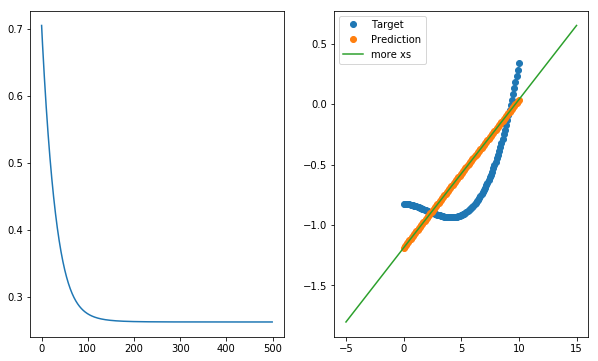

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(error_trace)

plt.subplot(1, 2, 2)
plt.plot(X, T, 'o', label='Target')
plt.plot(X, use_linear(w, X), 'o', label='Prediction')
more_xs = np.linspace(-5, 15, 100).reshape((-1, 1))
plt.plot(more_xs, use_linear(w, more_xs), label='more xs')
plt.legend();

## Analysis

Looking at the results, we can see that after 500 epochs there is not much change going on anymore. If the Learning Rate was altered to be something smaller then this might be less exponential. In the graph on the right the green line represents the linear line and we can see that our prediction is matching very well in the mid-lower left around 4 on the x-axis and upper right near 9 on the x-axis, with the largest gap around the 5 point on the x-axis.

## Tanh Model

Given the weight vector, $\wv$, as a column vector, and the $n^{th}$ input sample, $\xv_n$, as a column vector, the prediction for the above linear model can be written as

$$ y_n = \xv_n^T \wv$$

The prediction for our $\tanh$ model is given by

$$ y_n = \tanh (\xv_n^T \wv) $$

We begin by finding the derivative of this as follows (Let $f$ represent $\tanh$):

$$
\begin{align*}
\frac{\partial}{\partial w} f(x_n w) &= \frac{\partial}{\partial x_n w} f(x_n w) \times \frac{\partial}{\partial w} x_n w\\
&=
f'(x_n w) \times x_n
\end{align*}
$$

Thus, if we sovle for only the derivative of $\tanh (y_n)$, we can use this gradient of the sum of squared error function with respect to the weights in our training method and simply multiply the $\wv$ by the gradient in our previous method.

To calculate the gradient for the tanh function we perform the following (source: https://theclevermachine.wordpress.com/2014/09/08/derivation-derivatives-for-common-neural-network-activation-functions/):

$$
\begin{align*}
\acute{tanh (y_n)} &= \frac{\partial sinh(y_n)} {\partial y_n\cosh(y_n)} \\
&= 
\frac{\frac{\partial}{\partial y_n} sinh(y_n) \times cosh(y_n) - \frac{\partial }{\partial y_n} cosh(y_n) \times \sinh(y_n)}
{cosh^2(y_n)} \\
&=
\frac{cosh^2(y_n) \times \sinh^2(y_n)}
{cosh^2(y_n)} \\
&=
1 - \frac{sinh^2(y_n)}{cosh^2(y_n)} \\
&=
1 - tanh^2(y_n) \\
\end{align*}
$$

# Functions

## train_tanh

returns a matrix of one column containing the resulting weights and a list of RMSE values, calculated after each epoch, using the rmse function

In [8]:
def train_tanh(X, T, learning_rate, number_of_iterations):
    # Initialize and add a column of 1s
    T1 = np.insert(T, 0, 1, 1)
    X1 = np.insert(X, 0, 1, 1)
    
    # Start weight array at a value of 0
    w = np.zeros((X1.shape[1], T.shape[1]))
    e_trace_list = list()
    
    for iter in range(number_of_iterations):
        for n in range(X1.shape[0]):
            # Calculate prediction using current model, w
            predicted = np.tanh(X1[n:n+1, :] @ w)
            # Update w using negative gradient of error for nth sample multiplied by the gradient of tanh
            w += learning_rate * X1[n:n+1, :].T * (T[n:n+1, :] - predicted) * (1 - predicted**2)
        
        predict = use_tanh(w, X)
        e_trace_list.append(rmse(predict, T))

    return (w, e_trace_list)

## use_tanh

returns a matrix of one column containing the predicted values for each value in T

In [9]:
def use_tanh(model, X):
    return np.tanh(np.insert(X, 0, 1, 1) @ model)

# Examples

In [10]:
w, error_trace = train_tanh(X, T, 0.001, 500)
print(rmse(use_tanh(w, X), T))

0.15179499396092516


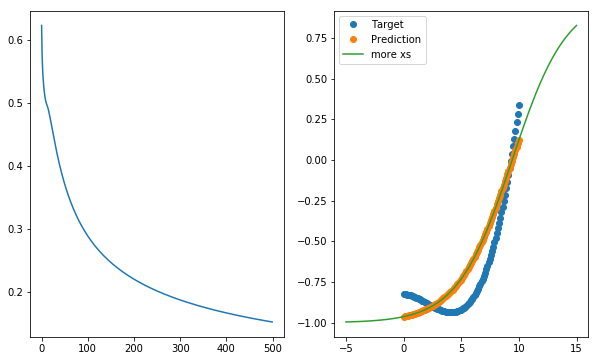

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(error_trace)

plt.subplot(1, 2, 2)
plt.plot(X, T, 'o', label='Target')
plt.plot(X, use_tanh(w, X), 'o', label='Prediction')
# more_xs = np.linspace(-2, 12, 100).reshape((-1, 1))
plt.plot(more_xs, use_tanh(w, more_xs), label='more xs')

plt.legend();

## Analysis

Looking at the results, the errors are still going down but it is not as fast as before. If we used a longer number of epochs then we we may get some more results and see if the learning rate continues to go down. In the right graph, the green line shows the tanh function and our target is fitting it slightly better this time though still not perfect. We can see that our prediction is matching well in the lower left around 7 and in the upper right around 9, but the biggest gap in error is in the middle around the 5 mark on the x axis.

## Grading

Your notebook will be run and graded automatically.  Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  You should see a perfect execution score of 75 out of 75 points if your functions are defined correctly. The remaining 25 points will be based on the results you obtain from the energy data and on your discussions.

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

A different, but similar, grading script will be used to grade your checked-in notebook.  It will include additional tests.  You need not include code to test that the values passed in to your functions are the correct form.  

In [12]:
%run -i "A1grader.py"


======================= Code Execution =======================

Extracting python code from notebook named 'Kielman-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
  w, errors = train_linear(X, T, 0.01, 1000)

--- 15/15 points. Returned correct values.

Testing
  prediction = use_linear(w, X)

--- 15/15 points. Returned correct values.

Testing
  rmse_error = rmse(prediction, T)

--- 15/15 points. Returned correct values.

Testing
  w, errors = train_tanh(X, T, 0.01, 1000)

--- 15/15 points. Returned correct values.

Testing
  prediction = use_tanh(w, X)

--- 15/15 points. Returned correct values.

C:\Users\Admin\Spring 2019 Classes\CS445 - Intro to Machine Learning\HW1 Execution Grade is 75 / 75

 Remaining 25 points will be based on your text describing the derivation of gradients, exp

<Figure size 432x288 with 0 Axes>

## Extra Credit

Define two new functions to handle the logistic, or sigmoid, function model, 

$$ y_n = \frac{1}{1 + e^{- \xv_n^T \wv}} $$

## Anaylsis

I attempted to sovle this using the derivative formula for the logistic function model found on this (https://theclevermachine.wordpress.com/2014/09/08/derivation-derivatives-for-common-neural-network-activation-functions/) site but unfortunately wasn't able to fully test my restuls even after modifying the data to not include 0. I feel that I somehow still am, hence getting a divide by zero error, but I've included my work here for the sake of having it documented.

In [13]:
def train_logistic(X, T, learning_rate, number_of_iterations):
    # Initialize and add a column of 1s
    Ts1 = np.insert(T, 0, 1, 1)
    Xs1 = np.insert(X, 0, 1, 1)
    
    # Start weight array at a value of 0
    w = np.zeros((Xs1.shape[1], T.shape[1]))
    e_trace_list = list()
    
    for iter in range(number_of_iterations):
        for n in range(Xs1.shape[0]):
            predicted = np.log(Xs1[n:n+1, :] @ w)
            # Update w using derivative of error for nth sample multiplied by the gradient for logistic
            w += learning_rate * Xs1[n:n+1, :].T * np.log(T[n:n+1, :] - predicted) * ((predicted) * (1 - predicted))
            
        predict = use_logistic(w, X)
        e_trace_list.append(rmse(predict, T))

    return (w, e_trace_list)

In [14]:
def use_logistic(model, X):
    return np.log(np.insert(X, 0, 1, 1) @ model)

In [74]:
T = (T + 1) / 2
w, error_trace = train_logistic(X, T, 0.001, 500)
print(rmse(use_logistic(w, X), T))

A1grader.py:14: RuntimeWarning: divide by zero encountered in log
  
A1grader.py:16: RuntimeWarning: invalid value encountered in multiply
  # class TimeoutException(Exception):


nan


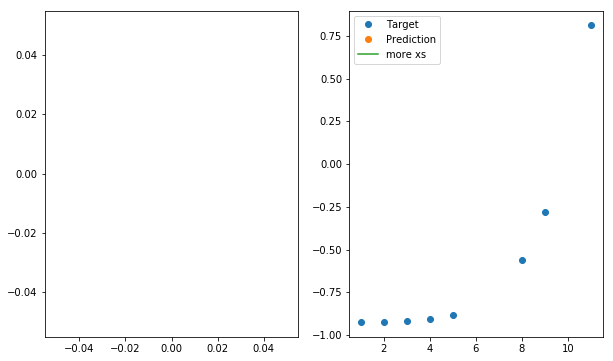

In [88]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(error_trace)

plt.subplot(1, 2, 2)
plt.plot(X, T, 'o', label='Target')
plt.plot(X, use_tanh(w, X), 'o', label='Prediction')
# more_xs = np.linspace(-2, 12, 100).reshape((-1, 1))
plt.plot(more_xs, use_tanh(w, more_xs), label='more xs')

plt.legend();